# Questions

Questions to Answer:
1. Who is the highest paid person?
2. What has been the highest salary per year since 2011?
3. What is the average salary for NY Authorites?
4. What NY Authorities pay people the most salary on average?
5. What NY Authorities pay people the most compensation?
6. What is the aggregate total of compensation for all years?

# My Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import vincent
reload(vincent)
vincent.initialize_notebook()
%matplotlib inline


# Getting The Data

In [2]:
path_to_data = 'C:\Users\kpark\Google Drive\NYC-DAT-34\projects\kyungjun_park\Salary_Information_for_State_Authorities.csv'
salary_data = pd.read_csv(path_to_data, sep=',')

c:\users\kpark\appdata\local\continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (2,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
salary_data = salary_data

# Data Cleaning

In [4]:
salary_data.rename(columns={'Fiscal Year End Date':'Date'}, inplace=True)
salary_data.columns = salary_data.columns.str.strip().str.replace(' ', '_')

In [5]:
salary_data.ix[np.random.permutation(salary_data.index)].head()

,Authority_Name,Date,Has_Employees,Last_Name,Middle_Initial,First_Name,Title,Group,Department,Pay_Type,Exempt_Indicator,Base_Annualized_Salary,Actual_Salary_Paid,Overtime_Paid,Performance_Bonus,Extra_Pay,Other_Compensation,Total_Compensation,Paid_By_Another_Entity,Paid_by_State_or_Local_Government
18361,Erie County Medical Center Corporation,12/31/2013,NaN,Lambert,A,Judy,General Duty Nurse RPT,Professional,4555 Dialysis HEMO,PT,N,$56114.24,$36454.47,$8549.19,$0.00,$1986.80,$2011.37,$49001.83,N,NaN
143880,Metropolitan Transportation Authority,12/31/2012,NaN,Villada,,Remedios,Admin Assistant-CCC,Administrative/Clerical,Office of Cap Construct Admin,FT,N,$68790.00,$68601.26,$0.00,$0.00,$0.00,$0.00,$68601.26,N,NaN
245220,Metropolitan Transportation Authority,12/31/2014,NaN,Giudice,,Anthony,Train Operator (Rev.Vehicles),Operational,Work Trains Subdivision B,FT,N,$67627.33,$0.00,$0.00,$0.00,$2119.32,$0.00,$2119.32,N,NaN
71669,Metropolitan Transportation Authority,12/31/2011,NaN,Defrancisci,P,John,Production Planner,Professional,Prod Plan/Invent Control/Proj,FT,Y,$69673.76,$69793.79,$0.00,$0.00,$0.00,$0.00,$69793.79,N,NaN
314617,Metropolitan Transportation Authority,12/31/2014,NaN,Wachtin,,Alan,Signal Inspector,Operational,Engineer Signal Construction,FT,Y,$81082.01,$104086.88,$32592.00,$0.00,$0.00,$100.00,$136778.88,N,NaN


In [6]:
salary_data.isnull().sum()

Authority_Name                            0
Date                                      0
Has_Employees                        416591
Last_Name                                13
Middle_Initial                        81849
First_Name                               13
Title                                    13
Group                                    13
Department                             3953
Pay_Type                                 13
Exempt_Indicator                         13
Base_Annualized_Salary                   13
Actual_Salary_Paid                       13
Overtime_Paid                            13
Performance_Bonus                        13
Extra_Pay                                13
Other_Compensation                       13
Total_Compensation                       13
Paid_By_Another_Entity                   13
Paid_by_State_or_Local_Government    416485
dtype: int64

In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416604 entries, 0 to 416603
Data columns (total 20 columns):
Authority_Name                       416604 non-null object
Date                                 416604 non-null object
Has_Employees                        13 non-null object
Last_Name                            416591 non-null object
Middle_Initial                       334755 non-null object
First_Name                           416591 non-null object
Title                                416591 non-null object
Group                                416591 non-null object
Department                           412651 non-null object
Pay_Type                             416591 non-null object
Exempt_Indicator                     416591 non-null object
Base_Annualized_Salary               416591 non-null object
Actual_Salary_Paid                   416591 non-null object
Overtime_Paid                        416591 non-null object
Performance_Bonus                    416591 non-null 

In [8]:
salary_data

,Authority_Name,Date,Has_Employees,Last_Name,Middle_Initial,First_Name,Title,Group,Department,Pay_Type,Exempt_Indicator,Base_Annualized_Salary,Actual_Salary_Paid,Overtime_Paid,Performance_Bonus,Extra_Pay,Other_Compensation,Total_Compensation,Paid_By_Another_Entity,Paid_by_State_or_Local_Government
0,Agriculture and New York State Horse Breeding ...,12/31/2011,NaN,Johnson,M,Christine,Controller,Administrative/Clerical,NaN,FT,N,$62000.00,$28725.55,$0.00,$0.00,$0.00,$0.00,$28725.55,N,NaN
1,Agriculture and New York State Horse Breeding ...,12/31/2011,NaN,Goold,G,Peter,Executive Director,Executive,NaN,FT,N,$87500.00,$31973.09,$0.00,$0.00,$0.00,$0.00,$31973.09,N,NaN
2,Agriculture and New York State Horse Breeding ...,12/31/2011,NaN,Gordon,NaN,Tim,Executive Director,Executive,NaN,FT,Y,$87500.00,$68654.00,$0.00,$0.00,$0.00,$0.00,$68654.00,N,NaN
3,Agriculture and New York State Horse Breeding ...,12/31/2012,NaN,Mullaney,NaN,Michael,Executive Director,Executive,NaN,FT,N,$85000.00,$25826.95,$0.00,$0.00,$0.00,$0.00,$25826.95,N,NaN
4,Agriculture and New York State Horse Breeding ...,12/31/2012,NaN,Gordon,NaN,Timothy,Executive Director,Executive,NaN,FT,Y,$87500.00,$60114.08,$0.00,$0.00,$0.00,$0.00,$60114.08,N,NaN
5,Agriculture and New York State Horse Breeding ...,12/31/2013,NaN,Richardson,L,Connie,Executive Assistant,Administrative/Clerical,NaN,FT,Y,$44007.00,$15257.43,$0.00,$0.00,$0.00,$0.00,$15257.43,N,NaN
6,Agriculture and New York State Horse Breeding ...,12/31/2013,NaN,Mullaney,C,Michael,Executive Director,Executive,NaN,FT,Y,$85000.00,$85000.00,$0.00,$0.00,$0.00,$0.00,$85000.00,N,NaN
7,Agriculture and New York State Horse Breeding ...,12/31/2014,NaN,Michael,C,Mullaney,Executive Director - Resigned 09/05/2014,Executive,NaN,FT,Y,$62115.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,N,NaN
8,Agriculture and New York State Horse Breeding ...,12/31/2014,NaN,Richardson,L,Connie,Executive Assistant,Administrative/Clerical,NaN,FT,Y,$44077.00,$44077.00,$0.00,$0.00,$0.00,$0.00,$44077.00,N,NaN
9,Albany Convention Center Authority,12/31/2011,NaN,Sorrentino,NaN,Al,Project Manager,Managerial,NaN,FT,Y,$77625.00,$77625.00,$0.00,$0.00,$0.00,$0.00,$77625.00,N,NaN


In [9]:
columns = ['Actual_Salary_Paid','Overtime_Paid', 'Performance_Bonus', 'Extra_Pay','Other_Compensation', 'Total_Compensation']
for i in columns:
    salary_data[i] = salary_data[i].str.replace('$', '').astype('float64')

# Some Descriptive Statistics

In [10]:
salary_data.describe()

,Actual_Salary_Paid,Overtime_Paid,Performance_Bonus,Extra_Pay,Other_Compensation,Total_Compensation
count,416591.000000,416591.000000,416591.000000,416591.000000,416591.000000,416591.000000
mean,57837.285175,7973.265490,68.726224,2282.838910,559.050308,68721.166107
std,33260.748167,11889.447389,1615.026306,6177.575868,3445.402485,40190.259288
min,-8797.560000,0.000000,0.000000,0.000000,-34928.000000,0.000000
25%,41485.010000,21.560000,0.000000,0.000000,0.000000,46420.895000
50%,61718.000000,2861.250000,0.000000,254.980000,50.000000,70859.180000
75%,71683.635000,11211.830000,0.000000,2227.605000,388.010000,89476.825000
max,1110866.430000,186000.000000,484663.000000,405892.810000,735124.720000,1854993.380000


In [11]:
salary_data['Year'] = pd.DatetimeIndex(salary_data['Date']).year

In [12]:
salary_data.groupby('Year').sum()

,Actual_Salary_Paid,Overtime_Paid,Performance_Bonus,Extra_Pay,Other_Compensation,Total_Compensation
Year,,,,,,
2011,6.109464e+09,7.556568e+08,9240147.32,1.035808e+08,37766035.530000,7.015708e+09
2012,5.905301e+09,7.598525e+08,5332912.12,2.095622e+08,55839190.339998,6.935888e+09
2013,5.940596e+09,8.549027e+08,7980126.58,1.514534e+08,49102325.120000,7.004035e+09
2014,6.139131e+09,9.511786e+08,6077540.34,4.864138e+08,90187775.789999,7.672988e+09


# Plots

c:\users\kpark\appdata\local\continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


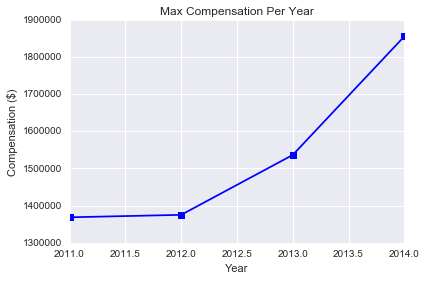

In [13]:
fig, ax = plt.subplots() 
ax.ticklabel_format(useOffset=False, style='plain', scilimits = (0,0))
plt.plot(salary_data.groupby('Year')[['Total_Compensation']].max(), 'bs-')
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.title("Max Compensation Per Year")
f = ax.set_xlabel('Year')
f = ax.set_ylabel('Compensation ($)')


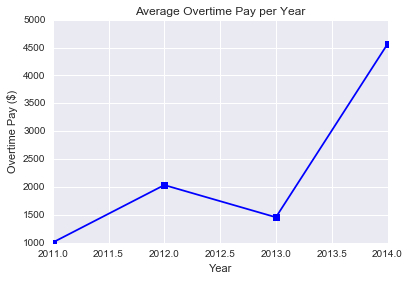

In [79]:
fig, ax = plt.subplots() 
ax.ticklabel_format(useOffset=False, style='plain', scilimits = (0,0))
plt.plot(salary_data.groupby('Year')[['Extra_Pay']].mean(), 'bs-')
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.title("Average Overtime Pay per Year")
f = ax.set_xlabel('Year')
f = ax.set_ylabel('Overtime Pay ($)')

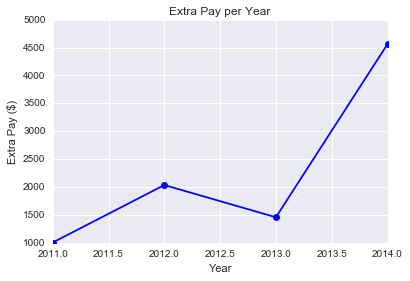

In [86]:
fig, ax = plt.subplots() 
ax.ticklabel_format(useOffset=False, style='plain', scilimits = (0,0))
plt.plot(salary_data.groupby('Year')[['Extra_Pay']].mean(), 'bo-')
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.title("Extra Pay per Year")
f = ax.set_xlabel('Year')
f = ax.set_ylabel('Extra Pay ($)')

c:\users\kpark\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


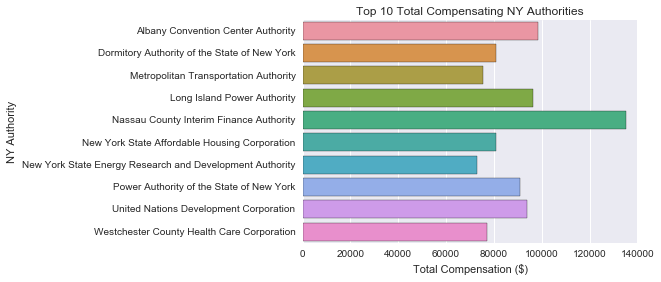

In [14]:
top_auth = salary_data[['Authority_Name','Total_Compensation']].groupby('Authority_Name').mean().sort('Total_Compensation', ascending = False)
data = salary_data[salary_data.Authority_Name.isin(top_auth[:10].index)] 

f = sb.barplot(x='Total_Compensation', y='Authority_Name', ci = None, data=data)
f.set(xlabel='Total Compensation ($)', title ='Top 10 Total Compensating NY Authorities', ylabel = 'NY Authority')
plt.show()

c:\users\kpark\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


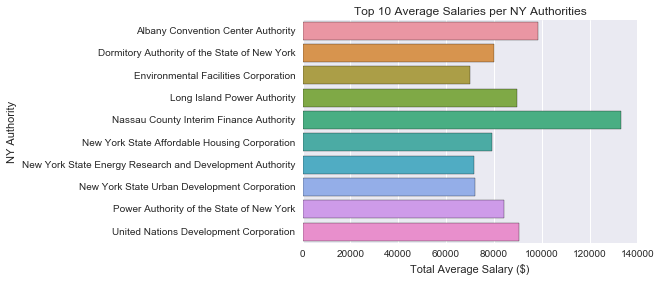

In [89]:
top_auth = salary_data[['Authority_Name','Actual_Salary_Paid']].groupby('Authority_Name').mean().sort('Actual_Salary_Paid', ascending = False)
data = salary_data[salary_data.Authority_Name.isin(top_auth[:10].index)] 

f = sb.barplot(x='Actual_Salary_Paid', y='Authority_Name', ci = None, data=data)
f.set(xlabel='Total Average Salary ($)', title ='Top 10 Average Salaries per NY Authorities', ylabel = 'NY Authority')
plt.show()

c:\users\kpark\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


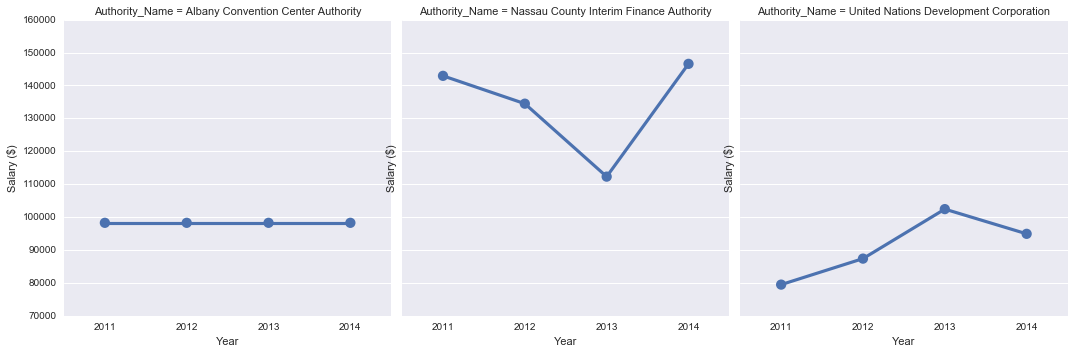

In [16]:
# look at top 3 Authorities with Highest AVG Salary per Year
top_auth = salary_data[['Authority_Name','Actual_Salary_Paid']].groupby('Authority_Name').mean().sort('Actual_Salary_Paid', ascending=False)
data = salary_data[salary_data.Authority_Name.isin(top_auth[:3].index)] 

# Actual Mean Salary per Year for the top 3 Authorities
f = sb.factorplot(x='Year', y='Actual_Salary_Paid', col='Authority_Name', col_wrap = 3, legend = True, size = 5, ci = None, data=data)
f.set(ylabel='Salary ($)')
plt.show()

c:\users\kpark\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


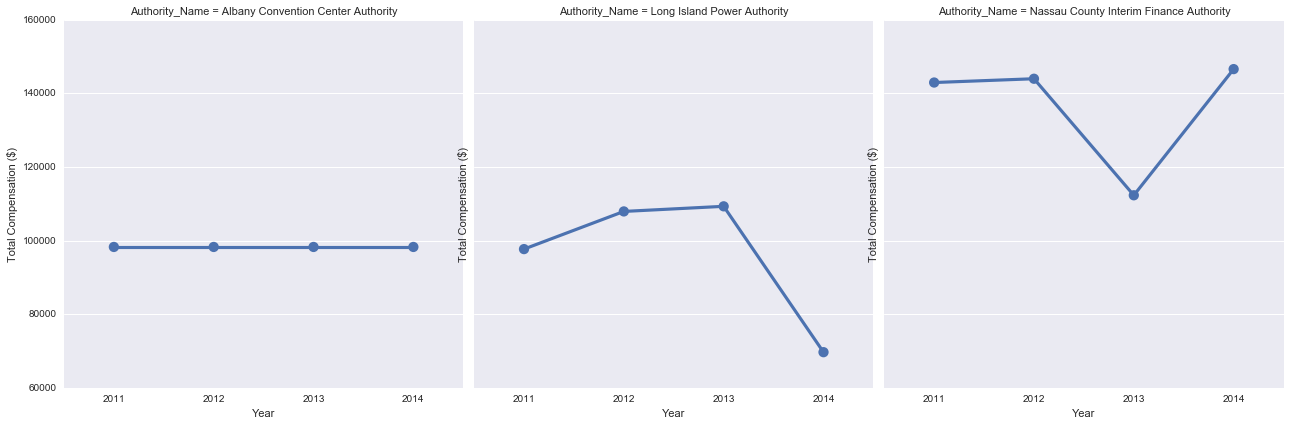

In [17]:
# look at top 3 Authorities with Highest AVG Compensation
top_auth = salary_data[['Authority_Name', 'Total_Compensation']].groupby('Authority_Name').mean().sort('Total_Compensation', ascending=False)
data = salary_data[salary_data.Authority_Name.isin(top_auth[:3].index)] 

# Actual Mean Compensation per Year for the top 3 Authorities
f = sb.factorplot(x='Year', y='Total_Compensation', col='Authority_Name', col_wrap = 3, legend = True, size = 6, ci = None, data=data)
f.set(ylabel='Total Compensation ($)')
plt.show()

In [35]:
#How much total money was spent on NY Authority Employees Each Year
auth_salary = salary_data[salary_data['Year'] >= 2011].groupby('Year')[['Actual_Salary_Paid', 'Overtime_Paid','Performance_Bonus',
'Extra_Pay','Other_Compensation']].sum()
salary_plot = vincent.Bar(auth_salary)
salary_plot.axis_titles(x='Year', y='Total Payments')
salary_plot.legend(title='Type of Expense')

In [76]:
#Rough check to see if plot is on point with Total compensation
salary_data[['Total_Compensation','Actual_Salary_Paid']].sum().astype(float)

Total_Compensation    2.862862e+10
Actual_Salary_Paid    2.409449e+10
dtype: float64

In [88]:
#Who is the richest at any point this year?
salary_data.loc[salary_data.Total_Compensation == salary_data.Total_Compensation.max(),
['Year','Title', 'Authority_Name', 'First_Name', "Last_Name", 'Actual_Salary_Paid','Overtime_Paid','Extra_Pay','Performance_Bonus',"Total_Compensation"]]


,Year,Title,Authority_Name,First_Name,Last_Name,Actual_Salary_Paid,Overtime_Paid,Extra_Pay,Performance_Bonus,Total_Compensation
416603,2014,President & CEO,Westchester County Health Care Corporation,Michael,Israel,1110866.43,0,378170.34,349887.31,1854993.38
